# COVID-19 Mortality Prediction with Support Vector Regression Model

### Dependencies importing

In [39]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [41]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

In [42]:
### TBE done!
country='India'

In [43]:
### TBE done!
data_index = pd.read_csv(get_csv_out_path(f'index_{country}.csv'))

In [44]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-03-11,0.045644,0.044053,0.148258,62.0,6.0,1.0,1.0,0.052713,0.0,0.0,0.0,0.0
1,2020-03-12,0.045644,0.044053,0.148258,73.0,11.0,1.0,0.0,0.052713,0.0,0.0,0.0,0.0
2,2020-03-13,0.049527,0.068369,0.148258,82.0,9.0,2.0,1.0,0.056281,0.0,0.0,0.0,0.0
3,2020-03-14,0.049527,0.068369,0.148258,102.0,20.0,2.0,0.0,0.056281,0.0,0.0,0.0,0.0
4,2020-03-15,0.052431,0.072914,0.148258,113.0,11.0,2.0,0.0,0.058974,0.0,0.0,0.0,0.0


In [45]:
data_index=data_index.set_index('date')

In [46]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052431,0.072914,0.222387,330.0,86.0,4.0,0.0,0.064326,0.0,0.0,...,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132055,0.164072,0.222387,396.0,66.0,7.0,3.0,0.137589,0.0,0.0,...,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.117977,0.142038,0.222387,499.0,103.0,10.0,3.0,0.124638,0.0,0.0,...,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.117977,0.142038,0.222387,536.0,37.0,10.0,0.0,0.124638,0.0,0.0,...,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132055,0.164072,0.222387,657.0,121.0,12.0,2.0,0.137589,0.0,0.0,...,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0


In [47]:
data_index=data_index.fillna(0)

In [48]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052431,0.072914,0.222387,330.0,86.0,4.0,0.0,0.064326,0.0,0.0,...,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132055,0.164072,0.222387,396.0,66.0,7.0,3.0,0.137589,0.0,0.0,...,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.117977,0.142038,0.222387,499.0,103.0,10.0,3.0,0.124638,0.0,0.0,...,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.117977,0.142038,0.222387,536.0,37.0,10.0,0.0,0.124638,0.0,0.0,...,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132055,0.164072,0.222387,657.0,121.0,12.0,2.0,0.137589,0.0,0.0,...,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0


Text(0.5, 0, 'Date')

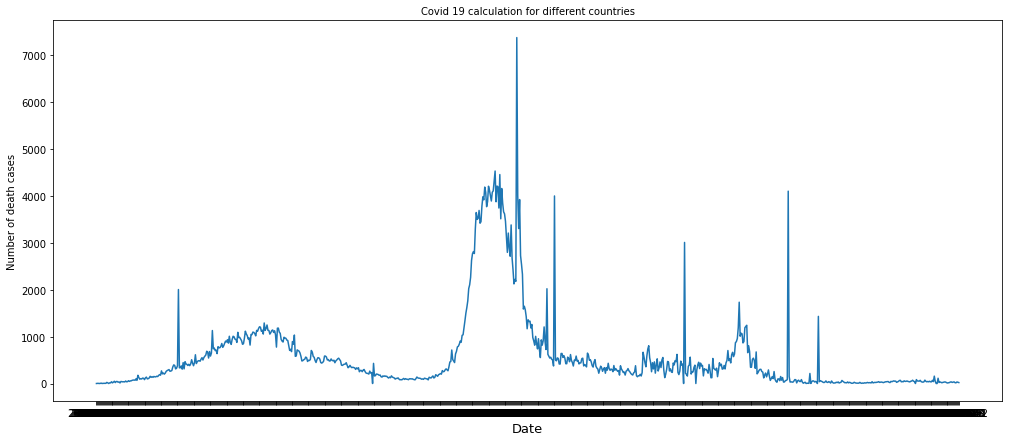

In [49]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

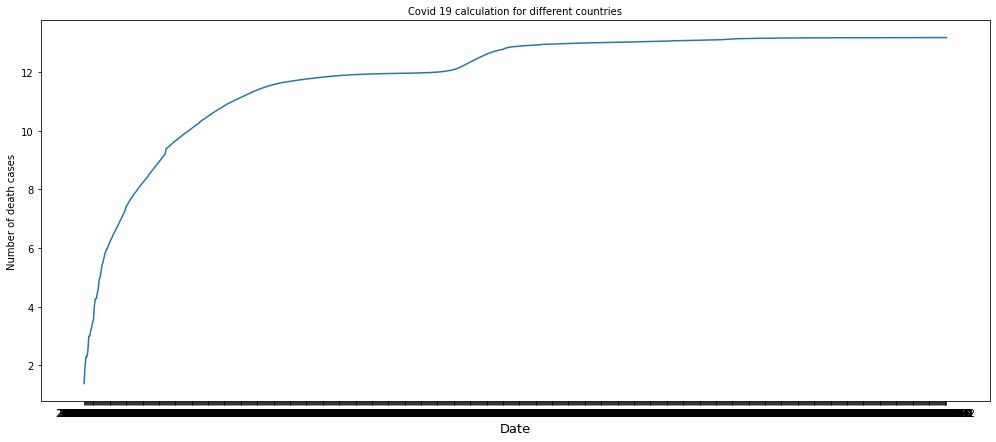

In [50]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index[:925],np.log(data_index['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

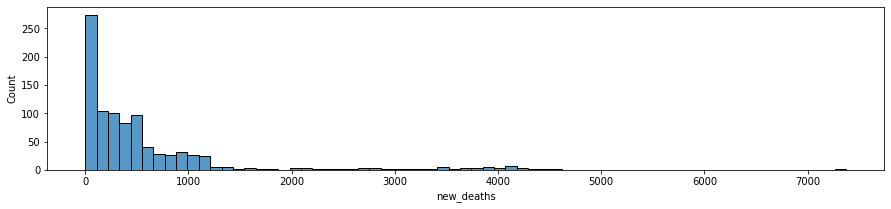

In [51]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [52]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [53]:
X

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052431,0.072914,0.222387,330.0,0.064326,0.000000e+00,0.000000e+00,0.0,0.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132055,0.164072,0.222387,396.0,0.137589,0.000000e+00,0.000000e+00,0.0,0.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.117977,0.142038,0.222387,499.0,0.124638,0.000000e+00,0.000000e+00,0.0,0.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.117977,0.142038,0.222387,536.0,0.124638,0.000000e+00,0.000000e+00,0.0,0.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132055,0.164072,0.222387,657.0,0.137589,0.000000e+00,0.000000e+00,0.0,0.0,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,0.000000,0.000000,0.000000,44539046.0,0.069232,2.165983e+09,1.025815e+09,946508327.0,193659567.0,528337.0,528302.0,528273.0,528250.0,528216.0,528185.0,528165.0,528150.0,528139.0,528121.0
2022-09-19,0.000000,0.000000,0.000000,44543089.0,0.069232,2.167186e+09,1.025858e+09,946678783.0,194649320.0,528355.0,528337.0,528302.0,528273.0,528250.0,528216.0,528185.0,528165.0,528150.0,528139.0
2022-09-20,0.000000,0.000000,0.000000,44545011.0,0.069232,2.168506e+09,1.025905e+09,946810471.0,195790643.0,528370.0,528355.0,528337.0,528302.0,528273.0,528250.0,528216.0,528185.0,528165.0,528150.0


## scaling data

In [54]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [55]:
n = len(X)
X_train = X[0:int(n-15)]
X_test=X[int(n-15):]
y_train=y[0:int(n-15)]
y_test=y[int(n-15):]

In [56]:
X_test_columns=data_index.drop(columns=['total_deaths','new_cases','new_deaths'])
X_test_columns.columns

Index(['containment_and_health', 'stringency', 'economics_sup', 'total_cases',
       'gov_response', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'day-1', 'day-2', 'day-3',
       'day-4', 'day-5', 'day-6', 'day-7', 'day-8', 'day-9', 'day-10'],
      dtype='object')

In [57]:
X_test_df=pd.DataFrame(X_test,columns=X_test_columns.columns)
X_predict=X_test_df.tail(10)
X_predict=X_predict.reset_index(drop=True)

In [58]:
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929000,0.999538,0.999550,0.999584,0.999591,0.999591,0.999599,0.999591,0.999584,0.999604,0.999633
1,0.000000,0.0000,0.0,0.999059,0.054643,0.993467,0.999541,0.998452,0.938212,0.999597,0.999587,0.999612,0.999612,0.999625,0.999657,0.999654,0.999635,0.999648,0.999663
2,0.000000,0.0000,0.0,0.999200,0.054643,0.994834,0.999626,0.998721,0.951464,0.999661,0.999646,0.999650,0.999640,0.999646,0.999691,0.999712,0.999697,0.999699,0.999707
3,0.000000,0.0000,0.0,0.999329,0.054643,0.995739,0.999703,0.998984,0.959722,0.999705,0.999710,0.999709,0.999678,0.999674,0.999712,0.999746,0.999756,0.999761,0.999758
4,0.000000,0.0000,0.0,0.999456,0.054643,0.996804,0.999767,0.999184,0.970097,0.999760,0.999754,0.999773,0.999737,0.999712,0.999741,0.999767,0.999790,0.999820,0.999820
5,0.000000,0.0000,0.0,0.999565,0.054643,0.997534,0.999816,0.999375,0.976928,0.999826,0.999809,0.999816,0.999801,0.999771,0.999779,0.999796,0.999811,0.999854,0.999879
6,0.000000,0.0000,0.0,0.999656,0.054643,0.998088,0.999858,0.999555,0.981920,0.999860,0.999875,0.999871,0.999845,0.999835,0.999837,0.999833,0.999839,0.999875,0.999913
7,0.000000,0.0000,0.0,0.999699,0.054643,0.998696,0.999903,0.999694,0.987678,0.999888,0.999909,0.999938,0.999900,0.999879,0.999902,0.999892,0.999877,0.999903,0.999934
8,0.000000,0.0000,0.0,0.999879,0.054643,0.999271,0.999949,0.999831,0.993085,0.999951,0.999938,0.999972,0.999966,0.999934,0.999945,0.999956,0.999936,0.999941,0.999962
9,0.000000,0.0000,0.0,1.000000,0.054643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
for i in range(1,10):
    X_predict.loc[i,'containment_and_health':'total_boosters']=X_predict.loc[0,'containment_and_health':'total_boosters']
    

X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999538,0.999550,0.999584,0.999591,0.999591,0.999599,0.999591,0.999584,0.999604,0.999633
1,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999597,0.999587,0.999612,0.999612,0.999625,0.999657,0.999654,0.999635,0.999648,0.999663
2,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999661,0.999646,0.999650,0.999640,0.999646,0.999691,0.999712,0.999697,0.999699,0.999707
3,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999705,0.999710,0.999709,0.999678,0.999674,0.999712,0.999746,0.999756,0.999761,0.999758
4,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999760,0.999754,0.999773,0.999737,0.999712,0.999741,0.999767,0.999790,0.999820,0.999820
5,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999826,0.999809,0.999816,0.999801,0.999771,0.999779,0.999796,0.999811,0.999854,0.999879
6,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999860,0.999875,0.999871,0.999845,0.999835,0.999837,0.999833,0.999839,0.999875,0.999913
7,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999888,0.999909,0.999938,0.999900,0.999879,0.999902,0.999892,0.999877,0.999903,0.999934
8,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,0.999951,0.999938,0.999972,0.999966,0.999934,0.999945,0.999956,0.999936,0.999941,0.999962
9,0.501631,0.3704,0.0,0.998914,0.054643,0.992508,0.999475,0.998254,0.929,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
min_num=y_test[0]
max_num=y_test[-1]
min_num
max_num

528449.0

In [61]:
list_pred=[]


for j in range(0,10):
    y_pred_=model.predict(pd.DataFrame(X_predict.loc[j]).T)
    list_pred.append(y_pred_)
    
    y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
    
    #X_predict[j+1,f'day-{j+1}']=y_pred_
    X_predict.at[j+1,f'day-{j+1}']=y_pred_scale
    
    
   

#do min max scaler and tranform y_pred1
    



X_predict
list_prediction

NameError: name 'model' is not defined

In [ ]:
list_pred[0][0]

519195.5781490885

In [ ]:
pd.DataFrame(X_predict.loc[0]).T

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999587,0.999568,0.99939,0.999449,0.999511,0.999477,0.999223,0.999176,0.999097,0.999091


# Model

In [ ]:
model =SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [ ]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.3s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.2s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=8, kernel=poly; total time=   7.3s
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.1s
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.3s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.1s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.1s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=3,

## fitting the model for train and test set

In [ ]:

model.fit(X_train,y_train)

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## prediction

In [ ]:
y_pred=model.predict(X_test)

## evaluating model performance

In [ ]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.010515389458774694

In [ ]:
y_pred.shape

NameError: name 'y_pred' is not defined

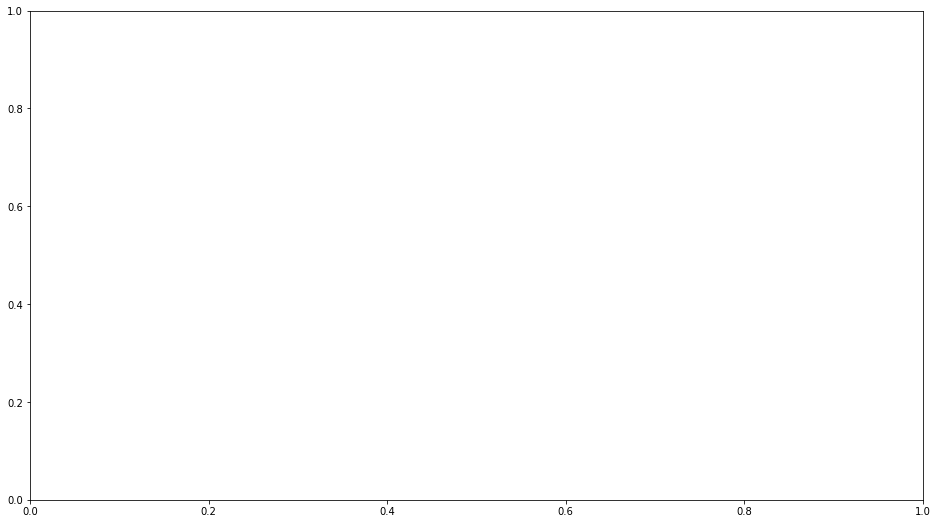

In [ ]:
# Total of death cases over time prediction for next 10 for Brazil country ploting
fig, ax = plt.subplots(1, figsize=(16, 9))
plt.plot(y_test.index, y_pred, color='r');
plt.plot(y_test.index, y_test);
ax.set_title(f"Covid 19 total death cases over time prediction for the next {n_days} for {country} country", size=10)
ax.set_ylabel("Total Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

In [ ]:
X_test_columns=data_index.drop(columns=['total_deaths','new_cases','new_deaths'])
X_test_columns.columns

In [ ]:
X_test_df=pd.DataFrame(X_test,columns=X_test_columns.columns)
X_predict=X_test_df.tail(10)
X_predict=X_predict.reset_index(drop=True)

In [ ]:
for i in range(1,10):
    X_predict.loc[i,'containment_and_health':'total_boosters']=X_predict.loc[0,'containment_and_health':'total_boosters']
    

X_predict

In [ ]:
min_num=y_test[0]
max_num=y_test[-1]
min_num
max_num

In [ ]:
list_pred=[]


for j in range(0,11):
    y_pred_=model.predict(pd.DataFrame(X_predict.loc[j]).T)
    list_pred.append(y_pred_)
    
    y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
    
    #X_predict[j+1,f'day-{j+1}']=y_pred_
    X_predict.at[j+1,f'day-{j+1}']=y_pred_scale